In [2]:
import pandas as pd

# Loading Dataset

1. what columns are preset?
2. what are the data types?
3. How many rows and columns are there?

In [6]:
df=pd.read_csv("../data/raw/Titanic-Dataset.csv")

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.shape

(891, 12)

# Initial Data Inspection

1. first and last few data
2. check missing values
3. summary statistics for numerical and categorical columns

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [19]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df["PassengerId"].dtype !="O"

True

In [24]:
df["Name"].dtype=="O"

True

In [41]:
numerical_columns = []
categorical_columns = []
for col in df.columns:
    if df[col].dtype == "O" and len(df[col].unique())< 20:
        categorical_columns.append(col)
    elif df[col].dtype != "O":
        numerical_columns.append(col)

In [42]:
len(df["Age"])

891

In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
numerical_columns, categorical_columns

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Sex', 'Embarked'])

In [29]:
for col in numerical_columns:
    print(df[col].describe())

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
count    891.000000
mean       0.381594
std        0

In [51]:
for col in categorical_columns:
    print(df[col].unique())

['male' 'female']
['S' 'C' 'Q' nan]


# Data Cleaning

1. Missing value handling
2. correct data types
3. remove duplicates if any

In [116]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_new          0
dtype: int64

In [118]:
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])

In [119]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_new          0
dtype: int64

In [120]:
df[df["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,male
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,female
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,female


In [123]:
df["Cabin"].fillna("Unknown", inplace=True)

In [125]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Sex_new        0
dtype: int64

In [126]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,female
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,female


In [128]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [129]:
df.dropna(subset=["Embarked"], inplace=True)

In [130]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Sex_new        0
dtype: int64

In [110]:
df["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [54]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
df.loc[0:3,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [65]:
df.iloc[df["Age"].idxmin(),:]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

In [68]:
df["Sex"].astype("category")

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): ['female', 'male']

In [131]:
df["Sex"].dtypes

dtype('O')

In [132]:
df["Sex"]=df["Sex"].astype("category")

In [133]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,male


In [134]:
df.drop(columns=["Sex_new"], inplace=True)

In [149]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Univariate Analysis

1. What is the distribution of Age, fare and other numerical vafriables?
2. How many males/females are there?
3. What is the survival rate overall

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

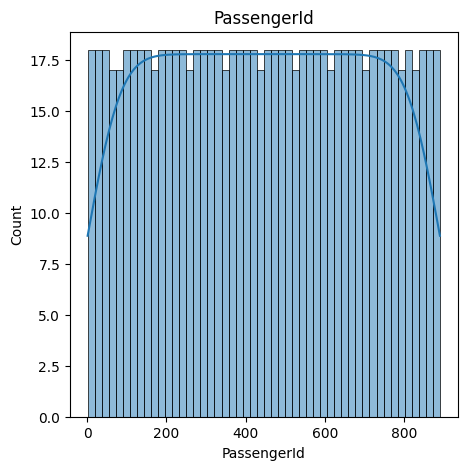

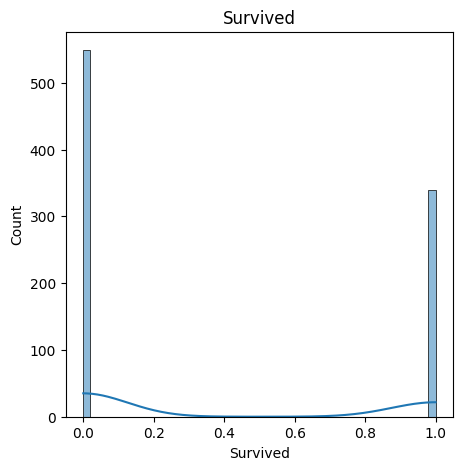

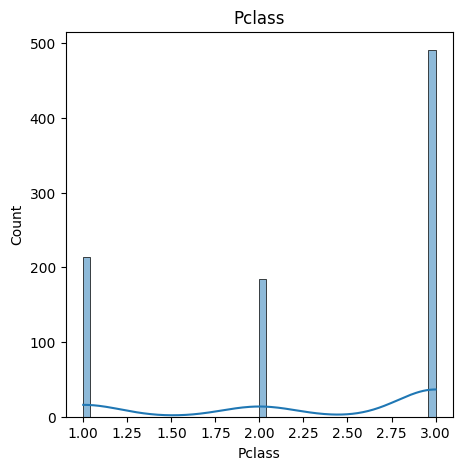

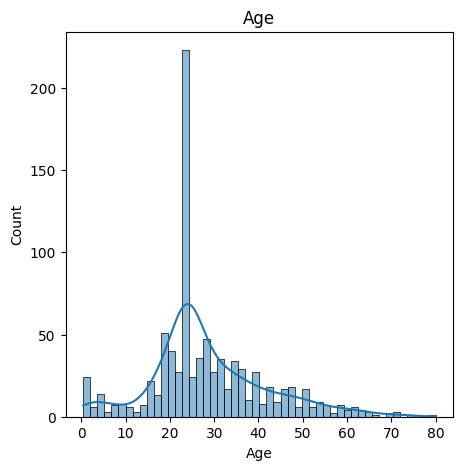

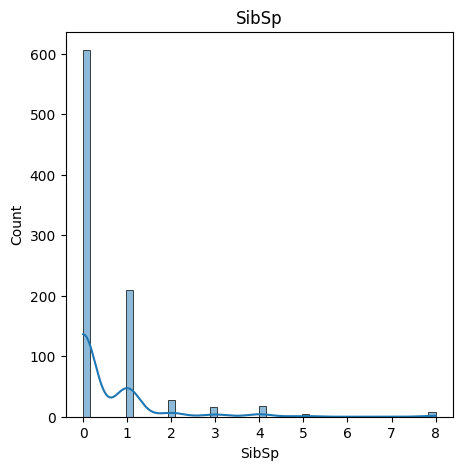

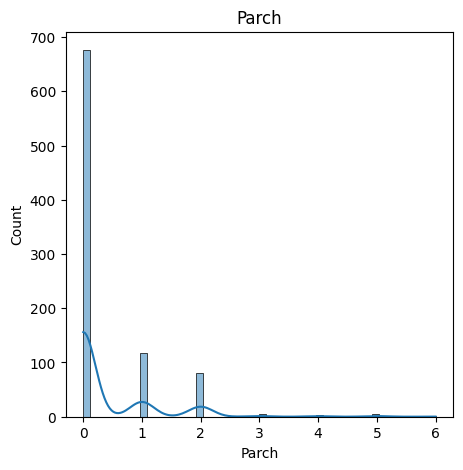

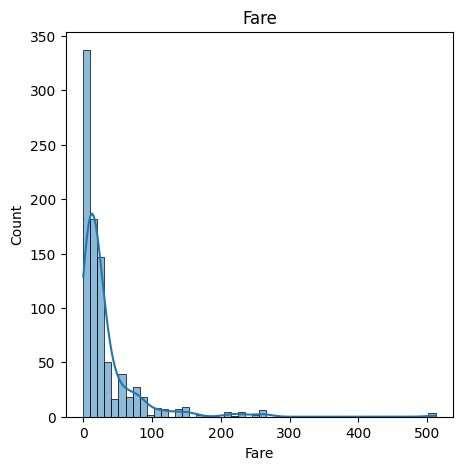

In [179]:
for col in numerical_columns:
    plt.figure(figsize=(5, 5))  # Set figure size
    sns.histplot(df[col], bins=50, kde=True)  # Use Seaborn's histplot
    plt.title(col)
    plt.show()


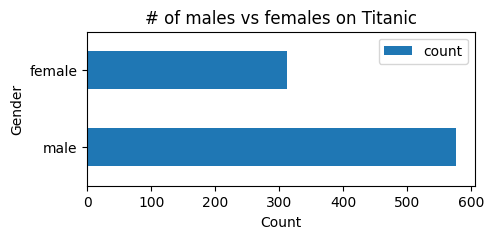

In [186]:
plot=df["Sex"].value_counts().plot(kind="barh",figsize=(5,2),legend=True,xlabel="Count",ylabel="Gender",title="# of males vs females on Titanic")
fig=plot.get_figure()
fig.savefig("../outputs/figures/males_vs_females.png")

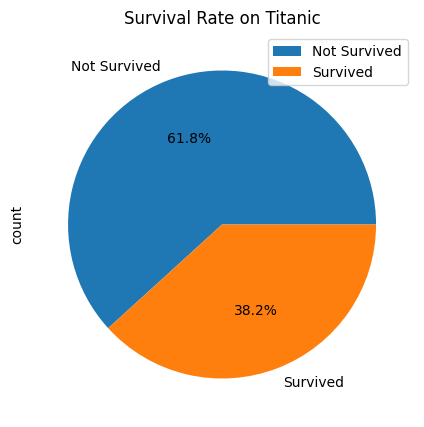

In [187]:
plot=df["Survived"].value_counts().plot(kind="pie",labels=["Not Survived","Survived"],autopct='%1.1f%%',figsize=(5,5),legend=True,title="Survival Rate on Titanic")
fig=plot.get_figure()
fig.savefig("../outputs/figures/survival_rate_on_titanic.png")

# Bivariate Analysis

1. Survival rate by gender
2. Survival rate by passenger class
3. Does age affect survival?
4. is there a relationship between fare paid and survival?

In [200]:
df.groupby("Survived")["Sex"].count()

Survived
0    549
1    340
Name: Sex, dtype: int64

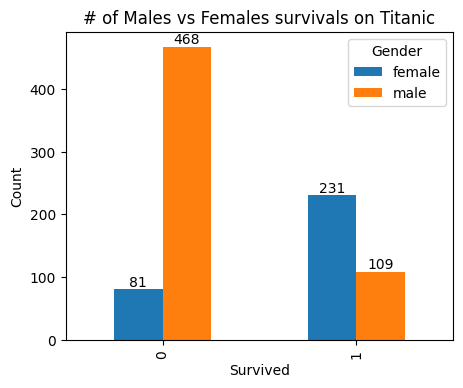

In [222]:
ax = df.groupby("Survived")["Sex"].value_counts().unstack().plot(kind="bar", figsize=(5, 4))
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("# of Males vs Females survivals on Titanic")
ax.bar_label(ax.containers[0], label_type='edge') 
ax.bar_label(ax.containers[1], label_type='edge')
plt.legend(title="Gender")
plt.show()
fig = ax.get_figure()
fig.savefig("../outputs/figures/male_vs_females_survival.png")


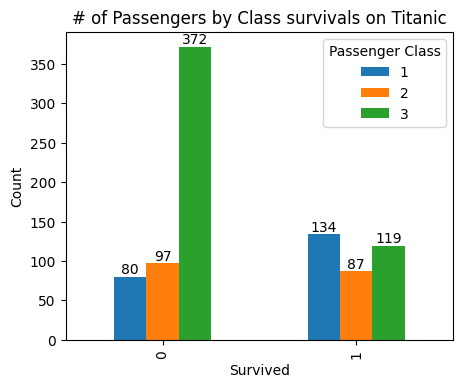

In [229]:
ax=df.groupby("Survived")["Pclass"].value_counts().unstack().plot(kind="bar", figsize=(5, 4))
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("# of Passengers by Class survivals on Titanic")  
for i in range(3):
    ax.bar_label(ax.containers[i], label_type='edge') 
plt.legend(title="Passenger Class")
plt.show()  
fig = ax.get_figure()
fig.savefig("../outputs/figures/passenger_class_survival.png")

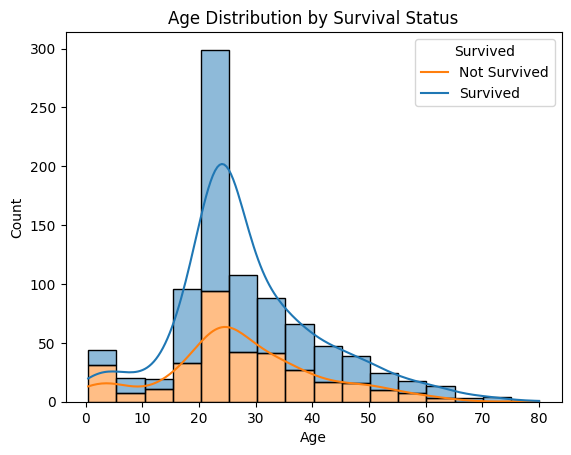

In [257]:
plot=sns.histplot(data=df, x="Age",hue="Survived", multiple="stack", kde=True, bins=16)
plot.set_title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count") 
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
fig = plot.get_figure()
fig.savefig("../outputs/figures/age_distribution_by_survival.png")

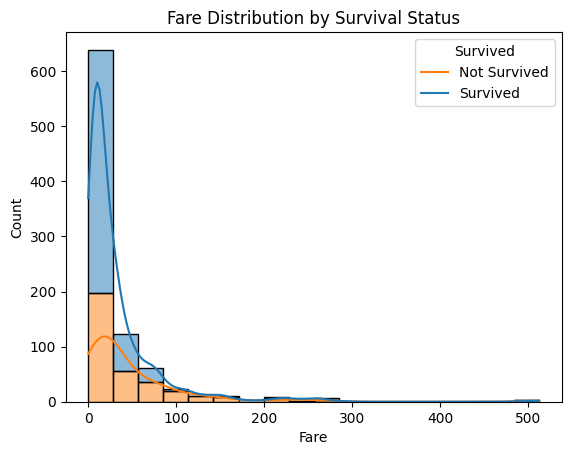

In [264]:
plot=sns.histplot(data=df, x="Fare", hue="Survived", multiple="stack", bins=18, kde=True)
plot.set_title("Fare Distribution by Survival Status")
plt.xlabel("Fare") 
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
fig = plot.get_figure()
fig.savefig("../outputs/figures/fare_distribution_by_survival.png")

# SQL Type

1. Slect the names and ages of all passengers who survived

In [3]:
import pandas as pd

In [ ]:
!pip install pandasql

In [14]:
import pandasql as ps
query = """SELECT Name, Age FROM df WHERE Survived=1"""
ps.sqldf(query, locals())

,Name,Age
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
1,"Heikkinen, Miss. Laina",26.0
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
4,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
...,...,...
337,"Najib, Miss. Adele Kiamie ""Jane""",15.0
338,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0
339,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0
340,"Graham, Miss. Margaret Edith",19.0


In [17]:
df[df["Survived"]==1].loc[:,["Name","Age"]]

,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",15.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0
880,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0
887,"Graham, Miss. Margaret Edith",19.0


2. Number of passenger in the class

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
ps.sqldf("SELECT Pclass,Count(Pclass) as No_of_Passengers FROM df GROUP BY Pclass", locals())

,Pclass,No_of_Passengers
0,1,216
1,2,184
2,3,491


In [35]:
df["Pclass"].value_counts().sort_index(ascending=True)

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

3. Find average fare paid by survivors and non-survivors.

In [36]:
ps.sqldf("SELECT Survived, AVG(Fare) FROM df GROUP BY Survived", locals())

,Survived,AVG(Fare)
0,0,22.117887
1,1,48.395408


In [37]:
df.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

4. Find the youngest passenger who embarked from 'S'

In [42]:
ps.sqldf("SELECT * FROM df WHERE Age= (SELECT min(Age) FROM df WHERE Embarked='S')",locals())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,None,S


In [60]:
df.iloc[df[df["Embarked"]=='S']["Age"].idxmin()]

PassengerId                          756
Survived                               1
Pclass                                 2
Name           Hamalainen, Master. Viljo
Sex                                 male
Age                                 0.67
SibSp                                  1
Parch                                  1
Ticket                            250649
Fare                                14.5
Cabin                                NaN
Embarked                               S
Name: 755, dtype: object

5. The survival rate by gender

In [87]:
ps.sqldf("SELECT Sex, SUM(Survived) as Survived, " \
"COUNT(*) as Total, " \
"CAST(SUM(Survived) AS FLOAT)/COUNT(*) *100 AS Proportion FROM df GROUP BY sex", locals())

,Sex,Survived,Total,Proportion
0,female,233,314,74.203822
1,male,109,577,18.890815


In [86]:
df_new=df.groupby("Sex").agg(Survived=("Survived", "sum"),
                     Total=("Survived", "count"))
df_new["Proportion"]=df_new["Survived"]/df_new["Total"]*100
df_new

,Survived,Total,Proportion
Sex,,,
female,233,314,74.203822
male,109,577,18.890815
